# Plot each step of EPI

### This notebook is sixth in the series of soiling detection pipeline notebooks (following step after the notebook <font color='green'>soiling_detection_regression.ipynb</font>)

Author: Lina Siegrist

### LINA's note: In this notebook, I plot EPI after each step of the filtering. 
1. Unfiltered EPI 
2. EPI After preprocessing (remove bad strings)
3. EPI with preprocessed and time masked
4. EPI with preprocessed, time masked and big-drop filtered
5. EPI with preprocessed, time masked, big-drop filtered and bad-day filtered

In [1]:
import pandas as pd
import numpy as np
import copy
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from pathlib import Path

## Import data from previous notebooks

### 1. Unfiltered EPI 

In [2]:
root_path = "../data/temp/park2/preprocessing/"
df_EPI_filepath = root_path + "df_EPI.csv"

In [3]:
def read_data(df_EPI_filepath):
    df_EPI = pd.read_csv(df_EPI_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return df_EPI

In [4]:
df_EPI = read_data(df_EPI_filepath)

In [5]:
df_EPI['median_EPI'] = df_EPI.loc[:,:].median(axis=1)
df_EPI_daily_median_series = df_EPI['median_EPI']

### 2. EPI After preprocessing (remove bad strings)

In [6]:
root_path = "../data/temp/park2/time_mask_filter/"
EPI_stringfilt_filepath = root_path + "EPI_stringfilt.csv"

In [7]:
def read_data(EPI_stringfilt_filepath):
    EPI_stringfilt = pd.read_csv(EPI_stringfilt_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return EPI_stringfilt

In [8]:
EPI_stringfilt = read_data(EPI_stringfilt_filepath)
# EPI_stringfilt= EPI_stringfilt.drop(columns=['med_strings', 'H'])

In [10]:
EPI_stringfilt['median_EPI'] = EPI_stringfilt.loc[:,:].median(axis=1)
EPI_stringfilt_median_series = EPI_stringfilt['median_EPI']

### 3. EPI with preprocessed and time masked

In [14]:
root_path = "../data/temp/park2/time_mask_filter/"
EPI_timemask_filepath = root_path + "EPI_timemask.csv"

In [15]:
def read_data(EPI_timemask_filepath):
    EPI_timemask = pd.read_csv(EPI_timemask_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return EPI_timemask

In [16]:
EPI_timemask = read_data(EPI_timemask_filepath)
# EPI_timemask= EPI_timemask.drop(columns='med_strings')

In [18]:
EPI_timemask['median_EPI'] = EPI_timemask.loc[:,:].median(axis=1)
EPI_timemaskt_median_series = EPI_timemask['median_EPI']

### 4. EPI with preprocessed, time masked and big-drop filtered

In [19]:
root_path = "../data/temp/park2/big_drop_filter/"
EPI_bigdrop_filt_filepath = root_path + "EPI_bigdrop_filt.csv"

In [20]:
def read_data(EPI_bigdrop_filt_filepath):
    EPI_bigdrop_filt = pd.read_csv(EPI_bigdrop_filt_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return EPI_bigdrop_filt

In [21]:
EPI_bigdrop_filt = read_data(EPI_bigdrop_filt_filepath)
# EPI_bigdrop_filt= EPI_bigdrop_filt.drop(columns='med_strings')

In [24]:
EPI_bigdrop_filt['median_EPI'] = EPI_bigdrop_filt.loc[:,:].median(axis=1)
EPI_bigdrop_filt_median_series = EPI_bigdrop_filt['median_EPI']

### 5. EPI with preprocessed, time masked, big-drop filtered and bad-day filtered

In [25]:
root_path = "../data/temp/park2/bad_day_filter/"
EPI_dropsfilt_baddayfilt_filepath = root_path + "EPI_dropsfilt_baddayfilt.csv"

In [26]:
def read_data(EPI_dropsfilt_baddayfilt_filepath):
    EPI_dropsfilt_baddayfilt = pd.read_csv(EPI_dropsfilt_baddayfilt_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return EPI_dropsfilt_baddayfilt

In [28]:
EPI_dropsfilt_baddayfilt = read_data(EPI_dropsfilt_baddayfilt_filepath)
# EPI_dropsfilt_baddayfilt= EPI_dropsfilt_baddayfilt.drop(columns='med_strings')

In [29]:
EPI_dropsfilt_baddayfilt['median_EPI'] = EPI_dropsfilt_baddayfilt.loc[:,:].median(axis=1)
EPI_dropsfilt_baddayfilt_median_series = EPI_dropsfilt_baddayfilt['median_EPI']

In [30]:
root_path = "../data/temp/park2/filtered/"
EPI_bigdrop_filt_filepath = root_path + "drops_filt.csv"

In [31]:
def read_data(EPI_bigdrop_filt_filepath):
    EPI_bigdrop_filt = pd.read_csv(EPI_bigdrop_filt_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return EPI_bigdrop_filt

In [32]:
EPI_bigdrop_filt = read_data(EPI_bigdrop_filt_filepath)
# EPI_bigdrop_filt= EPI_bigdrop_filt.drop(columns='med_strings')

In [33]:
EPI_bigdrop_filt['median_EPI'] = EPI_bigdrop_filt.loc[:,:].median(axis=1)
EPI_bigdrop_filt_median_series = EPI_bigdrop_filt['median_EPI']

## Plot: 1. unfiltered EPI

In [ ]:
df_EPI_daily_median_series

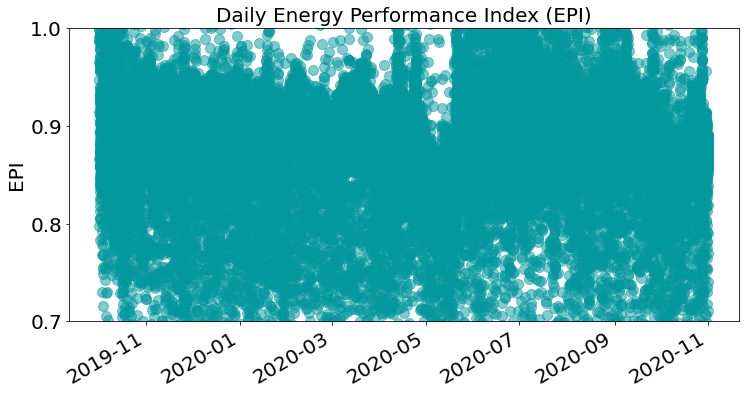

In [47]:
# def soiling_interval_plot(soiling_info, normalized_yield, point_alpha=0.5,
#                           profile_alpha=1, ymin=None, ymax=None,
#                           point_color=None, profile_color=None):

ymin=0.7
ymax=1.0

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_EPI_daily_median_series.index,df_EPI_daily_median_series,'o',alpha=0.5,markersize=10, color='#03989e')
ax.set_ylim(ymin, ymax)
ax.set_yticks(np.arange(ymin,1.05,0.1),minor=False)
ax.set_ylabel('EPI',fontsize=20)
ax.set_title('Daily Energy Performance Index (EPI)',fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
fig.autofmt_xdate();
# fig.savefig('EPI1.png');

## Plot: 2. EPI after preprocessing

In [ ]:
EPI_stringfilt_median_series

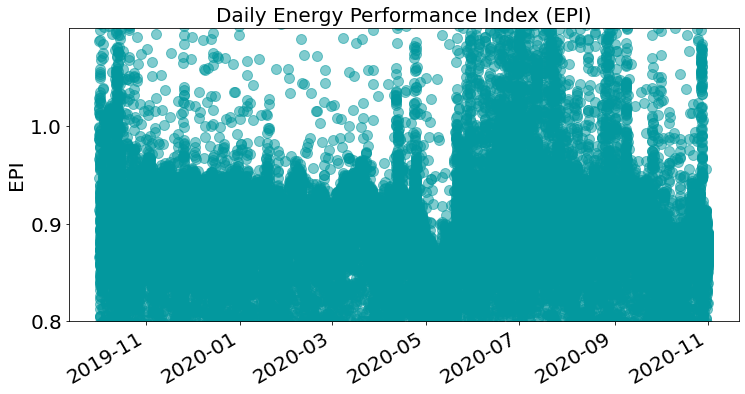

In [48]:
# def soiling_interval_plot(soiling_info, normalized_yield, point_alpha=0.5,
#                           profile_alpha=1, ymin=None, ymax=None,
#                           point_color=None, profile_color=None):

ymin=0.8
ymax=1.1

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(EPI_stringfilt_median_series.index,EPI_stringfilt_median_series,'o',alpha=0.5,markersize=10, color='#03989e')
ax.set_ylim(ymin, ymax)
ax.set_yticks(np.arange(ymin,1.05,0.1),minor=False)
ax.set_ylabel('EPI',fontsize=20)
ax.set_title('Daily Energy Performance Index (EPI)',fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
fig.autofmt_xdate();
# fig.savefig('EPI2.png');

## Plot: 3. preprocessed, time masked EPI

In [ ]:
EPI_timemaskt_median_series

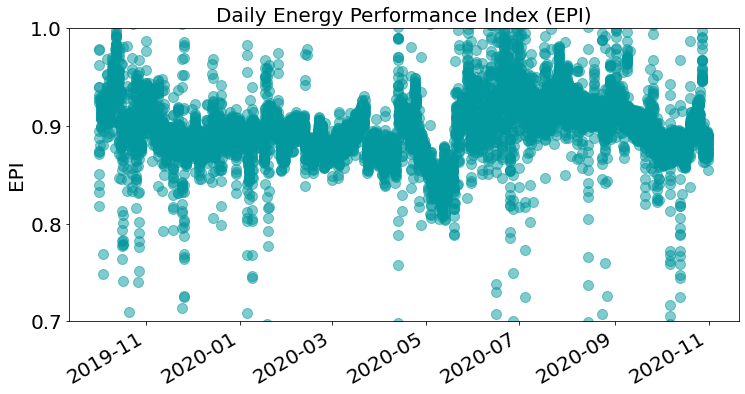

In [49]:
# def soiling_interval_plot(soiling_info, normalized_yield, point_alpha=0.5,
#                           profile_alpha=1, ymin=None, ymax=None,
#                           point_color=None, profile_color=None):

ymin=0.7
ymax=1.0

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(EPI_timemaskt_median_series.index,EPI_timemaskt_median_series,'o',alpha=0.5,markersize=10, color='#03989e')
ax.set_ylim(ymin, ymax)
ax.set_yticks(np.arange(ymin,1.05,0.1),minor=False)
ax.set_ylabel('EPI',fontsize=20)
ax.set_title('Daily Energy Performance Index (EPI)',fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
fig.autofmt_xdate();
# fig.savefig('EPI3.png');

## Plot: 4. preprocessed, time masked, big-drop filtered EPI

In [ ]:
EPI_bigdrop_filt_median_series

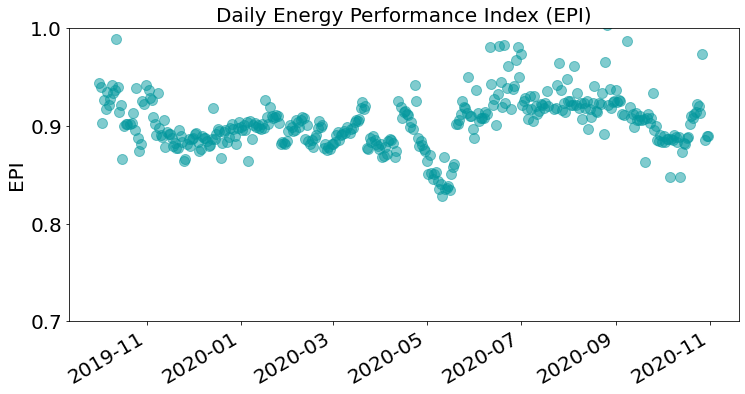

In [50]:
# def soiling_interval_plot(soiling_info, normalized_yield, point_alpha=0.5,
#                           profile_alpha=1, ymin=None, ymax=None,
#                           point_color=None, profile_color=None):

ymin=0.7
ymax=1.0

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(EPI_bigdrop_filt_median_series.index,EPI_bigdrop_filt_median_series,'o',alpha=0.5,markersize=10, color='#03989e')
ax.set_ylim(ymin, ymax)
ax.set_yticks(np.arange(ymin,1.05,0.1),minor=False)
ax.set_ylabel('EPI',fontsize=20)
ax.set_title('Daily Energy Performance Index (EPI)',fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
fig.autofmt_xdate();
# fig.savefig('EPI4.png');

## Plot: 5. preprocessed, time masked, big-drop filtered, bad-day filtered EPI

In [ ]:
EPI_dropsfilt_baddayfilt_median_series

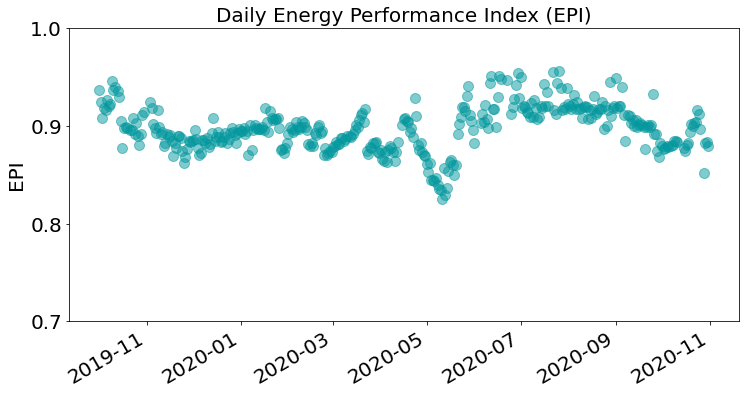

In [51]:
# def soiling_interval_plot(soiling_info, normalized_yield, point_alpha=0.5,
#                           profile_alpha=1, ymin=None, ymax=None,
#                           point_color=None, profile_color=None):

ymin=0.7
ymax=1.0

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(EPI_dropsfilt_baddayfilt_median_series.index,EPI_dropsfilt_baddayfilt_median_series,'o',alpha=0.5,markersize=10,color='#03989e')
ax.set_ylim(ymin, ymax)
# ax.set_yticks(np.arange(ymin,ymax,0.5),minor=False)
ax.set_yticks(np.arange(ymin,1.05,0.1),minor=False)
ax.set_ylabel('EPI',fontsize=20)
ax.set_title('Daily Energy Performance Index (EPI)',fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
fig.autofmt_xdate();
# fig.savefig('EPI5.png');